In [1]:
import cv2
from random import randint
from ipywidgets import widgets
from IPython.display import display, clear_output

import evaluatesvc

import warnings
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", UserWarning)

%matplotlib inline

In [2]:
# train the svc
%run trainsvc.py

Accuracy on training set:
1.0
Accuracy on testing set:
0.75
Classification Report:
             precision    recall  f1-score   support

          0       0.74      0.78      0.76        51
          1       0.76      0.71      0.74        49

avg / total       0.75      0.75      0.75       100

Confusion Matrix:
[[40 11]
 [14 35]]


This is a smile: [False]


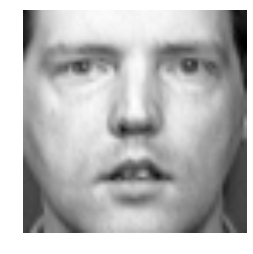

In [3]:
# TEST THE CLASSIFIER AGAINST THE DATA WITH WHICH IT WAS TRAINED, I.E. THE OLIVETTI DATABASE
faces = datasets.fetch_olivetti_faces()

def display_face(face):
    clear_output()
    imshow(face, cmap='gray')
    axis('off')

def display_face_and_prediction(b):
    index = randint(0, 400)
    face = faces.images[index]
    #face = cv2.imread('AM08HAS.jpg')
    display_face(face)
    print("This is a smile: {0}".format(svc_1.predict(faces.data[index, :])==1))

random_image_button = widgets.Button(description="New image!")
random_image_button.on_click(display_face_and_prediction)
display(random_image_button)
display_face_and_prediction(0)

In [4]:
# USE A TEST FACE FROM THE KAROLINISKA DATABASE C:\Users\ileppane\KDEF
# 140 images of each expression (straight angle)
strings1=["C:\Users\ileppane\KDEF\KDEF\AF"]*35+["C:\Users\ileppane\KDEF\KDEF\AM"]*35+["C:\Users\ileppane\KDEF\KDEF\BF"]*35+["C:\Users\ileppane\KDEF\KDEF\BM"]*35  
numbers=range(1,36)+range(1,36)+range(1,36)+range(1,36)
strings2=["\AF"]*35+["\AM"]*35+["\BF"]*35+["\BM"]*35
strings3=["HAS.JPG"]*35+["HAS.JPG"]*35+["HAS.JPG"]*35+["HAS.JPG"]*35
strings4=["NES.JPG"]*35+["NES.JPG"]*35+["NES.JPG"]*35+["NES.JPG"]*35
happyfaces=[]
neutralfaces=[]
for i in xrange(len(numbers)):
    happyfaces.append("%s%02d%s%02d%s" % (strings1[i],numbers[i],strings2[i],numbers[i],strings3[i]))
    neutralfaces.append("%s%02d%s%02d%s" % (strings1[i],numbers[i],strings2[i],numbers[i],strings4[i]))

# EVALUATE WHICH STRETCHING COEFFICIENTS GIVE THE LEAST NUMBER OF ERRORS
# original source uses (0.03, 0.05) but the first cofficient should be larger!
# CONFUSION MATRIX:
confmat = [0,0] # happycorrect, neutralcorrect
notdetected = [0,0] # happynodetect, neutralnodetect
t = randint(0,130) # take randomly a set of 10 consecutive face pictures
for i in xrange(10):
    happy = evaluatesvc.predictsmile(svc_1,happyfaces[i+t],0,(0.08,0.05))
    neutral = evaluatesvc.predictsmile(svc_1,neutralfaces[i+t],0,(0.08,0.05))
    confmat[0] += happy[0]
    confmat[1] += neutral[0]
    notdetected[0] += happy[1]
    notdetected[1] += neutral[1]

print confmat

[10, 7]


no smile


(0, 0)

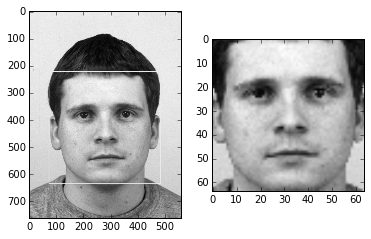

In [5]:
evaluatesvc.predictsmile(svc_1,neutralfaces[randint(0,140)],1,(0.03,0.05))